# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email

PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None # default='warn'
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [3]:
df_clean = pd.read_csv('superstore_retail_orders.csv')
df_clean.describe()

,order_id,quantity,product_price
count,56043.000000,56004.000000,56043.000000
mean,61668.410578,3.348582,6198.309433
std,7508.142486,422.654112,35784.965255
min,45079.000000,1.000000,2.290000
25%,55644.500000,1.000000,7.950000
50%,61870.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [6]:
#data preparation

# Convert any numbers into the correct datatype if they are not already numeric
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])
df_clean['order_year_month'] = pd.to_datetime(df_clean['order_year_month'])

# Convert any character variables in to factors if they are appropriate for that datatype
df_clean['product_status'] = df_clean['product_status'].astype('category')
df_clean['order_type'] = df_clean['order_type'].astype('category')

# Remove rows with empty (NULL) value
#df_clean.dropna(inplace = True)

# Create a total_amount variable, based on the product price and quantity
df_clean['total_amount'] = df_clean['product_price'] * df_clean['quantity']


In [5]:
#outlier check and cleanup
# check for invalid dates in data
df_clean[(df_clean['order_date'] > '2024-06-30')]
df_clean[(df_clean['order_year_month'] > '2024-06')]

# remove invalid dates
df_clean = df_clean[(df_clean['order_date'] < '2024-06-30') & (df_clean['order_year_month'] < '2024-06')]

In [7]:
#impute values
df_clean['order_date'] = df_clean['order_date'].ffill()
df_clean['order_year_month'] = df_clean['order_year_month'].ffill()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [8]:
#create variable
df_clean['complete_customer_info'] = 1
df_clean.loc[df_clean['quantity'].isnull() | df_clean['city'].isnull() | df_clean['state_province'].isnull(), 'complete_customer_info'] = 2


<Axes: xlabel='complete_customer_info'>

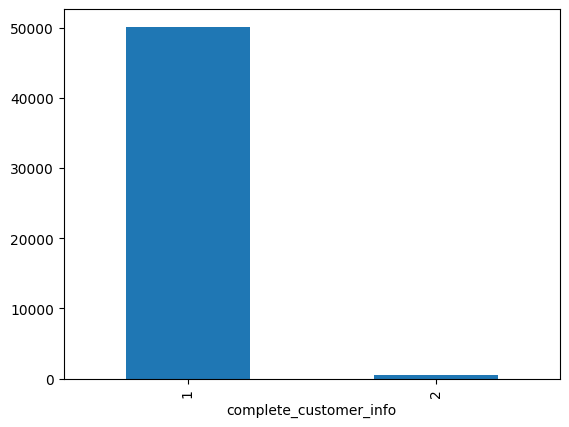

In [9]:
#create chart
df_clean['complete_customer_info'].value_counts().plot.bar()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [ ]:
#seasonality

In [ ]:
#revenue over time

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [ ]:
#indoor/outdoor variable